In [1]:
# Load MolKet's modules and libraries
include("../molket.jl")


Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor


First, we would like to calculate the harmonic potential of the symmetric stretch vibrational mode of $\text{CO}_2$ molecule. 

Vibrational frequency of the symmetric stretch mode of $\text{CO}_2$ is 1333 
$\text{cm}^{-1}$. (Reference: NIST database, https://webbook.nist.gov/cgi/cbook.cgi?ID=B4000020&Mask=800)

The Harmonic oscillator Hamiltonian in a second quantized form is given by:
$ \hat{H} = \hbar \omega \left( \hat{a}^{\dagger} \hat{a} + \frac{1}{2} \right) $ where $\hbar$ is the reduced Planck constant and $\omega$ is the vibrational frequency.

The terms $\hat{a}^{\dagger}$ and $\hat{a}$ are the creation and annihilation operators, respectively.

##### Mapping this particular Hamiltonian to a qubit Hamiltonian. 

Let's assume that we have 2 qubits to represent the vibrational mode. We express each vibrational level as a boson state $|n_i \rangle$ in the range $(0 \le n_i \le N_b)$.
We maps this number state to a qubit system state of $N_b + 1$ qubits using a tensor 
product of qubit states: 

$$
\begin{aligned}
\left|n_i\right\rangle \leftrightarrow & \left|0_0 \cdots 0_{n_i-1} 1_{n_i} 0_{n_i+1} \cdots 0_{N_b}\right\rangle \\
& =|0\rangle_0 \otimes \cdots \otimes|0\rangle_{n_i-1} \otimes|1\rangle_{n_i} \otimes|0\rangle_{n_i+1} \otimes \cdots \otimes|0\rangle_{N_b}
\end{aligned}
$$
where
$$
|0\rangle_j=\left(\begin{array}{l}
1 \\
0
\end{array}\right),|1\rangle_j=\left(\begin{array}{l}
0 \\
1
\end{array}\right),
$$
are computation basis states of qubit $j$. 

Hence, according to the formula, the state $|n_i\rangle$ = $|2_i\rangle$ at site $i$ is represented by:
$$
|2_i\rangle=|0\rangle_0 \otimes |0\rangle_1 \otimes |1\rangle_2 
$$
If we use the binary mapping, the state number $n_i$ is represented by the binary number $b_i$ of $N_b$ bits.

$$
\left|n_i\right\rangle \leftrightarrow |011 \cdots 101\rangle
$$
$$
\begin{aligned}
\left|n_i\right\rangle \leftrightarrow & |\underbrace{011 \cdots 101}_{\text {binary rep. of } n_i}\rangle \\
= & |0\rangle_1 \otimes|1\rangle_2 \otimes|1\rangle_3 \otimes \cdots \\
& \otimes|1\rangle_{N_q-2} \otimes|0\rangle_{N_q-1} \otimes|1\rangle_{N_q} .
\end{aligned}
$$

For example, the state $|2_i\rangle$ is represented by the binary number
$|2 \rangle = |1\rangle_{N_{(q = 2)} - 1} \otimes |0\rangle_{N_{(q = 2)}}  $
 leading to $|10\rangle$.

Now, we construct the matrix elements of the ladder operators $\hat{a}^{\dagger}$ and $\hat{a}$ in the qubit basis.

$$
\begin{aligned}
& \mathbf{I}_i=\left(\begin{array}{ccccc}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{array}\right) \\
& =I_1 \otimes I_2 \otimes \cdots \otimes I_{N_q}, \\
&
\end{aligned}
$$


We will consider the following Hamiltonian:

$$
\hat{H} = \hbar \omega \left( \hat{a}^{\dagger} \hat{a} + \frac{1}{2} \right) 
+ V_{anharmonic}
$$

The additional terms are the cubic and quartic anharmonic terms, they correct the potential energy surface of the molecule of interest which is the symmetric stretch of $\text{CO}_2$.

$$  V_{anharmonic} = g_1 \tilde{Q} + t_{111} \tilde{Q}^3 + u_{1111} \tilde{Q}^4 $$

The coefficients are taken from the paper: J. Chem. Phys. 126, 124303 (2007); doi: 10.1063/1.2710256:

| Coefficient | Value | unit |
| --- | --- | --- |
| $g_1$ | $-484.9598 \times 10^{-6}$ | au=$E_h$ |
| $t_{111}$ | $203.2777 \times 10^{-6}$ | au = $E_h$ |
| $u_{1111}$ | $8.3825 \times 10^{-6}$ | au = $E_h$ |

These coefficients can be obtained from the paper: J. Chem. Phys. 126, 124303 (2007); doi: 10.1063/1.2710256:

| Coefficient | Value | unit |
| --- | --- | --- |
| $g_1$ | $-0.0030609$ | $E_{h}$ $\AA^{-1} u^{-1/2}$ |
| $t_{111}$ | $0.30667$ | $E_{h}$ $\AA^{-3} u^{-3/2}$ |
| $u_{1111}$ | $0.31927$ | $E_{h}$ $\AA^{-4} u^{-2}$ |

The conversion took place as 

``` Julia


g1_constantEh = g1_constant*unit/sqrt_m_omegs
t111_constantEh = (1/6)*t111_constant*unit^3/sqrt_m_omegs^3
u1111_constantEh = (1/24)*u1111_constant*unit^4/sqrt_m_omegs^4

```


In [2]:
N = 4
# test Qcan function for each order 
unit = 1/(Ang*sqrt(amu))
mu = 1 # due to the assumption of dimensionless units
c_constant = -0.0030609
h_constant = 0.24379

# convert the constants to a.u. 
c_constant = c_constant*unit
h_constant = h_constant*unit^2
omega = sqrt(h_constant/mu)
println("omega = ", omega/cm1, " cm^-1")

sqrt_m_omegs = sqrt(mu*omega)
println("sqrt_m_omegs = ", sqrt_m_omegs)

g1_constant = -0.0030609
t111_constant = 0.30667
u1111_constant = 0.31927

# convert the constants to a.u.
g1_constantEh = g1_constant*unit/sqrt_m_omegs
t111_constantEh = (1/6)*t111_constant*unit^3/sqrt_m_omegs^3
u1111_constantEh = (1/24)*u1111_constant*unit^4/sqrt_m_omegs^4

V_anharmonic = g1_constantEh*Qcan_p1(N) + (1/6)*t111_constantEh*Qcan_p3(N) 
               + u1111_constantEh*Qcan_p4(N)/4

omega = 1343.1154739418596 cm^-1
sqrt_m_omegs = 0.07822841160624372


4×4 Matrix{ComplexF64}:
 0.0+0.0im         0.0+0.0im         0.0+0.0im         0.0+0.0im
 0.0+0.0im         0.0+0.0im         0.0+0.0im  5.13321e-6+0.0im
 0.0+0.0im         0.0+0.0im  6.28687e-6+0.0im         0.0+0.0im
 0.0+0.0im  5.13321e-6+0.0im         0.0+0.0im  1.88606e-5+0.0im

In [5]:
N = 4
npoints = 100
Qgrid = range(-5,stop=5,length=npoints)

qnum = [0,1,2,3]

V_anharmonic = g1_constantEh*Qcan_p1(N) + (1/6)*t111_constantEh*Qcan_p3(N) 
               + u1111_constantEh*Qcan_p4(N)/4
Hmat = H_harm(N;omega=omega)+  V_anharmonic

H_1D = H_ho1D(Hmat,qnum,Qgrid)
# print wavefunctions 
#println("Wavefunctions: ", H_1D.WFs)
# print the wfs in a table
show(stdout, "text/plain", H_1D.WFs)

100×4 Matrix{Union{Float64, Int64, ComplexF64}}:
  8.40301e-7+0.0im   -2.32592e-6+0.0im   -1.07175e-5+0.0im  -0.000381707+0.0im
  1.32789e-6+0.0im   -3.77881e-6+0.0im    -1.7964e-5+0.0im  -0.000590455+0.0im
  2.07741e-6+0.0im   -6.07672e-6+0.0im   -2.96858e-5+0.0im  -0.000902784+0.0im
  3.21767e-6+0.0im    -9.6723e-6+0.0im   -4.83788e-5+0.0im   -0.00136424+0.0im
  4.93456e-6+0.0im   -1.52379e-5+0.0im    -7.7772e-5+0.0im   -0.00203741+0.0im
  7.49327e-6+0.0im   -2.37598e-5+0.0im  -0.000123349+0.0im   -0.00300682+0.0im
  1.12679e-5+0.0im   -3.66667e-5+0.0im  -0.000193046+0.0im   -0.00438472+0.0im
  1.67801e-5+0.0im   -5.60015e-5+0.0im  -0.000298163+0.0im   -0.00631741+0.0im
  2.47494e-5+0.0im   -8.46468e-5+0.0im  -0.000454524+0.0im   -0.00899194+0.0im
  3.61569e-5+0.0im  -0.000126617+0.0im  -0.000683923+0.0im    -0.0126426+0.0im
  5.23254e-5+0.0im  -0.000187425+0.0im   -0.00101585+0.0im    -0.0175564+0.0im
  7.50188e-5+0.0im  -0.000274537+0.0im   -0.00148949+0.0im    -0.0240762+0.0im
 0.

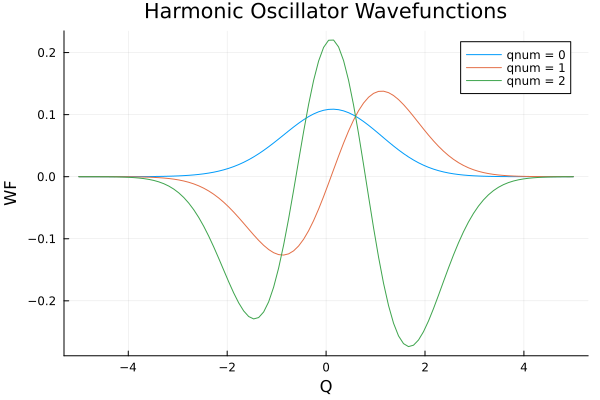

In [6]:
# plot the wavefunctions    
plot(Qgrid,H_1D.WFs[:,1],label="qnum = 0")

plot!(Qgrid,H_1D.WFs[:,2],label="qnum = 1")

plot!(Qgrid,H_1D.WFs[:,3],label="qnum = 2")

plot!(xlabel="Q",ylabel="WF",title="Harmonic Oscillator Wavefunctions")


